In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Let us try to apply the considered clustering methods to the data on the clients of a certain credit company: http://www-bcf.usc.edu/~gareth/ISL/data.html


In [5]:
credit = pd.read_csv('Credit.csv', index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


It seems that the variable 'Education' is categorical, while the codes are unknown. So, let us leave it out from data analysis. 

In [6]:
credit.drop('Education', axis=1, inplace=True)


In [7]:
credit.head()

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,Male,No,No,Asian,580
4,148.924,9504,681,3,36,Female,No,No,Asian,964
5,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331


Binarize the remaining variables.

In [8]:
X = pd.get_dummies(credit)
X.head()

,Income,Limit,Rating,Cards,Age,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,333,0,1,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,903,1,0,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,580,0,1,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,964,1,0,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,331,0,1,1,0,0,1,0,0,1


In [9]:
X.shape

(400, 15)

In [15]:
X.iloc[0]

Income                          14.891
Limit                         3606.000
Rating                         283.000
Cards                            2.000
Age                             34.000
Balance                        333.000
Gender_Female                    0.000
Gender_Male                      1.000
Student_No                       1.000
Student_Yes                      0.000
Married_No                       0.000
Married_Yes                      1.000
Ethnicity_African American       0.000
Ethnicity_Asian                  0.000
Ethnicity_Caucasian              1.000
Name: 1, dtype: float64

In [16]:
type(X.iloc[0])

pandas.core.series.Series

In [13]:
X.iloc[7:100]

,Income,Limit,Rating,Cards,Age,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
8,71.408,7114,512,2,87,872,0,1,1,0,1,0,0,1,0
9,15.125,3300,266,5,66,279,1,0,1,0,1,0,0,0,1
10,71.061,6819,491,3,41,1350,1,0,0,1,0,1,1,0,0
11,63.095,8117,589,4,30,1407,0,1,1,0,0,1,0,0,1
12,15.045,1311,138,3,64,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,14.084,855,120,5,46,0,1,0,1,0,0,1,1,0,0
97,14.312,5382,367,1,59,1380,0,1,0,1,1,0,0,1,0
98,26.067,3388,266,4,74,155,1,0,1,0,0,1,1,0,0
99,36.295,2963,241,2,68,375,1,0,0,1,1,0,1,0,0


In [14]:
type(X.iloc[7:100])

pandas.core.frame.DataFrame

In [17]:
a=9.0

In [18]:
type(a)

float

For better representation of results, let us create two functions. The function pair_plot for visualisation of attribute dsitibution hystograms and their pair-wise plots.

In [44]:
def pairplot(X, y=None, colors=None):
    fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], figsize=(15,15))

    if y is None:
        y = np.array([0]*X.shape[0])
    unique_y, col_idx = np.unique(y, return_inverse=True)
    if colors is None:
        colors = ['blue']
    colors = np.array(colors)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if i == j:
                for k, v in enumerate(unique_y):
                    axes[i, j].hist(X.iloc[y == v, i].values, 15, color=colors[k], alpha=0.5)
            else:
                axes[i, j].scatter(X.iloc[:, i].values, X.iloc[:, j].values, c=colors[col_idx], s=8)
            if i == X.shape[1] - 1:
                axes[i, j].set_xlabel(X.columns[j])
            if j == 0:
                axes[i, j].set_ylabel(X.columns[i])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

The function value_counts for computing frequency of unique attribute values in each cluster.

In [50]:
def value_counts(X, y=None):
    for c in X.columns:
        print("---- %s ---" % c)
        if y is None:
            print(X[c].value_counts())
        else:
            print(pd.pivot_table(pd.DataFrame({c: X[c].values, 'cluster': y}), index=[c], columns=['cluster'], aggfunc=len))

In [21]:
X.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance', 'Gender_Female',
       'Gender_Male', 'Student_No', 'Student_Yes', 'Married_No', 'Married_Yes',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [23]:
for c in X.columns:
    print("---- %s ---" % c, type(c))

---- Income --- <class 'str'>
---- Limit --- <class 'str'>
---- Rating --- <class 'str'>
---- Cards --- <class 'str'>
---- Age --- <class 'str'>
---- Balance --- <class 'str'>
---- Gender_Female --- <class 'str'>
---- Gender_Male --- <class 'str'>
---- Student_No --- <class 'str'>
---- Student_Yes --- <class 'str'>
---- Married_No --- <class 'str'>
---- Married_Yes --- <class 'str'>
---- Ethnicity_African American --- <class 'str'>
---- Ethnicity_Asian --- <class 'str'>
---- Ethnicity_Caucasian --- <class 'str'>


In [24]:
X['Ethnicity_African American'].value_counts()

0    301
1     99
Name: Ethnicity_African American, dtype: int64

In [25]:
X['Income'].value_counts()

23.793     2
30.002     1
10.742     1
59.530     1
20.150     1
          ..
25.124     1
151.947    1
57.202     1
101.788    1
15.125     1
Name: Income, Length: 399, dtype: int64

In [26]:
len(X)

400

Sort out quantitative and categorical attributes.

In [27]:
num_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance']
cat_features = [c for c in credit.columns if not(c in num_features)]

Have a look on data distributions.

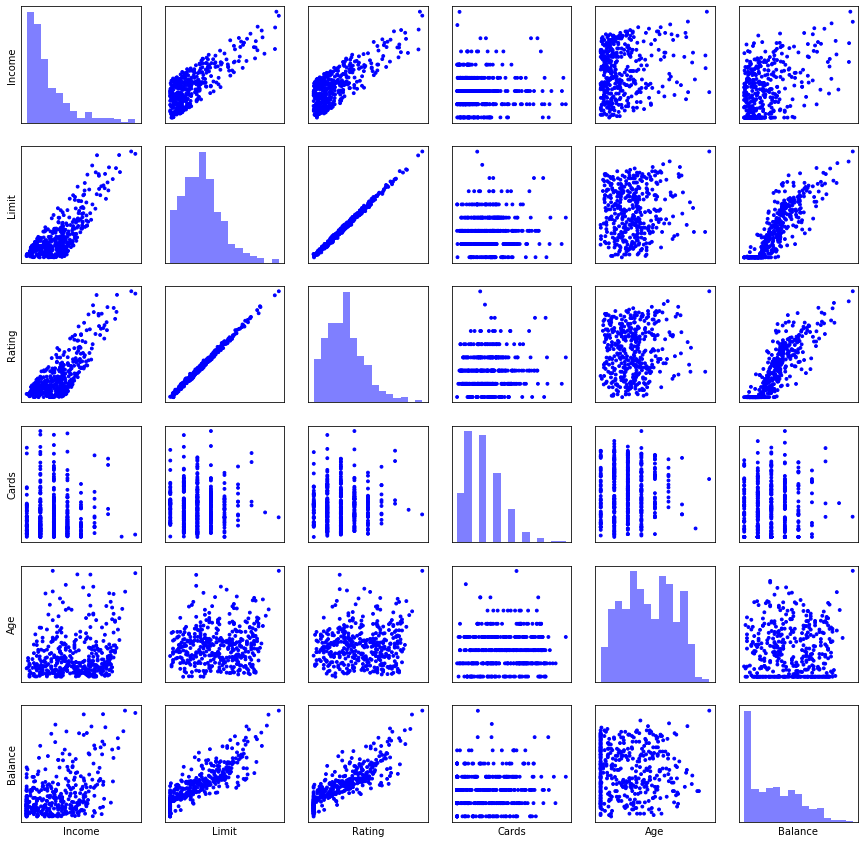

In [9]:
pairplot(credit[num_features])

In [10]:
value_counts(credit[cat_features])

---- Gender ---
Female    207
Male      193
Name: Gender, dtype: int64
---- Student ---
No     360
Yes     40
Name: Student, dtype: int64
---- Married ---
Yes    245
No     155
Name: Married, dtype: int64
---- Ethnicity ---
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


Standartise the data. 

In [28]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [29]:
X.shape

(400, 15)

In [33]:
X[0,:]

array([-0.86158299, -0.48999879, -0.46553881, -0.6991298 , -1.2576741 ,
       -0.40727698, -1.03563452,  1.03563452,  0.33333333, -0.33333333,
       -0.79539491,  0.79539491, -0.57350122, -0.58504861,  1.00501256])

## K-Means

Let us start with 2 clusters.

In [34]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=10, n_jobs=4, max_iter=1000)
y_pred2 = kmeans2.fit_predict(X)

In [35]:
y_pred2

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

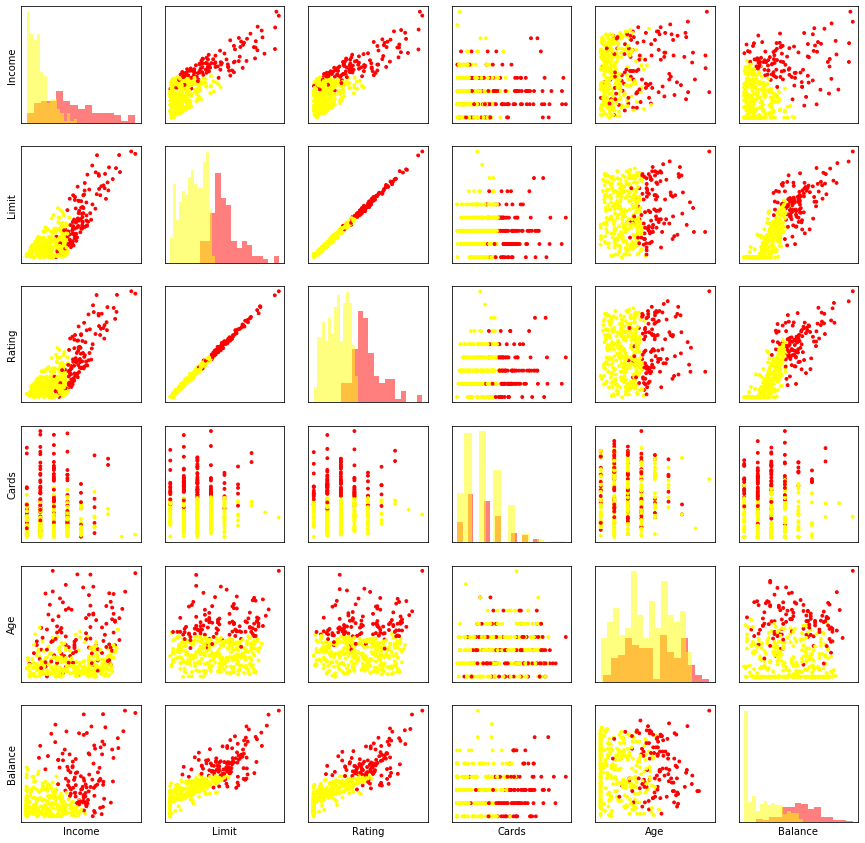

In [45]:
pairplot(credit[num_features], y_pred2, colors=['red', 'yellow'])

In [42]:
value_counts(credit[cat_features], y_pred2)

---- Gender ---
cluster   0    1
Gender          
Female   58  149
Male     55  138
---- Student ---
cluster   0    1
Student         
No       89  271
Yes      24   16
---- Married ---
cluster   0    1
Married         
No       47  108
Yes      66  179
---- Ethnicity ---
cluster            0    1
Ethnicity                
African American  25   74
Asian             27   75
Caucasian         61  138


In this clustering problem we do not have class labels, which makes the quality assesment difficult. In scikit-learn we have two measures: Silhouette and Calinski-Harabaz measures.

Let us create a function for better results' presentation. 

In [36]:
from sklearn.metrics import calinski_harabaz_score, silhouette_samples, silhouette_score
import matplotlib.cm as cm # needed to set a color scheme

def estimate_cluster(X, y_pred, name_of_alg=None):
    if not (name_of_alg is None):
        print(("Algorithm: " + name_of_alg))
    
    # Calinski-Harabaz - ratio between the within-cluster dispersion and the between-cluster dispersion
    # Greater is better
    print("Calinski-Harabaz: %.4f" % calinski_harabaz_score(X, y_pred))

    silhouette_avg = silhouette_score(X, y_pred)
    print("Average silhouette: %.4f" % silhouette_avg)

    n_clusters = len(np.unique(y_pred))

    # Show how silhouettes are chaged in each cluster
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlim([-0.1, 1])
    # 10 is needed for indentation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    # iterate over all the clusters
    for i in range(n_clusters):
        # Aggregate and sort silhouettes of objects in the cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("nipy_spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Print the number of the cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute a new lower boundary between cluster silhouettes 
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes of different clusters")
    ax1.set_xlabel("Silhouette value")
    ax1.set_ylabel("Cluster number")

    # Vertical line shows average value
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


Algorithm: K-Means, 2 clusters
Calinski-Harabaz: 69.4211
Average silhouette: 0.1818
Sum of squared distances to cluster centroids: 5108.8831


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


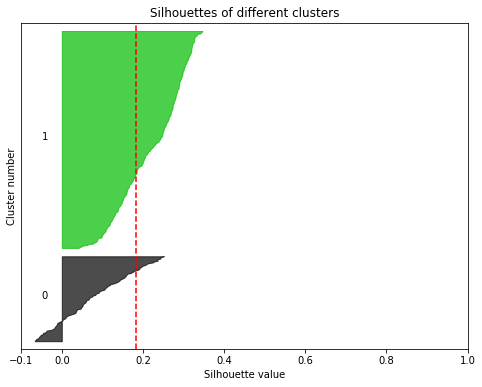

In [38]:
estimate_cluster(X, y_pred2, 'K-Means, 2 clusters')
print("Sum of squared distances to cluster centroids: %.4f" % kmeans2.inertia_)

The optimal number of clusters for K-Means may be determined using the elbow method.

In [39]:
# Train K-Means with a different number of clusters and see 
# how the sum of the squared distances to the centroids of the clusters has changed
J = []
params = np.arange(1, 40)
for k in params:
    kmeans = KMeans(n_clusters=k, random_state=10, n_jobs=4, max_iter=1000)
    kmeans.fit(X)
    J.append(kmeans.inertia_)
J = np.array(J)

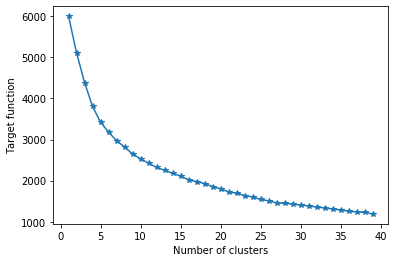

In [40]:
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Target function')
plt.show()

In [23]:
J

array([6000.        , 5108.88310332, 4386.80539649, 3804.51218567,
       3421.50948432, 3178.10821338, 2974.2685111 , 2813.8259123 ,
       2649.37988639, 2527.76339898, 2427.30389204, 2321.17928769,
       2252.74513508, 2177.25345199, 2110.85769912, 2018.80985101,
       1976.57655731, 1929.59372651, 1853.61808623])

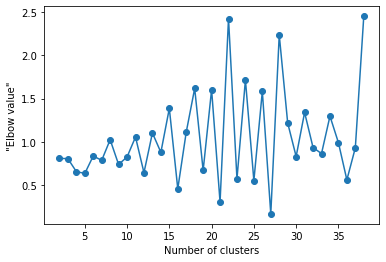

In [27]:
D = np.abs(J[1:-1]-J[2:])/np.abs(J[:-2] - J[1:-1])
plt.plot(params[1:-1], D, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('\"Elbow value\"')
plt.show()

The elbow value was decreasing while number of clusters grow to 5, and then began to increase and fluctuate significantly, so let's try to train K-Means with 5 clusters and look at the results.

Algorithm: K-Means, 5 clusters
Calinski-Harabaz: 74.4192
Average silhouette: 0.1817
Sum of squared distances to cluster centroids: 3421.5095


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


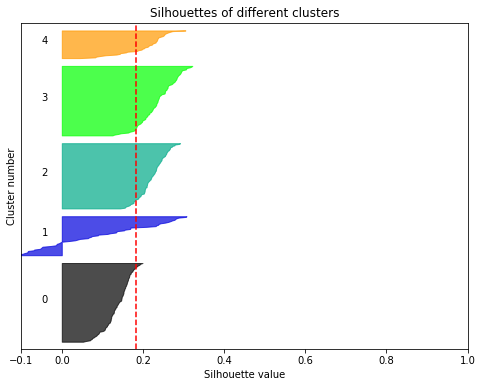

In [47]:
kmeans5 = KMeans(n_clusters=5, random_state=10, n_jobs=4, max_iter=1000)
y_pred5 = kmeans5.fit_predict(X)
estimate_cluster(X, y_pred5, 'K-Means, 5 clusters')
print("Sum of squared distances to cluster centroids: %.4f" % kmeans5.inertia_)

The average silhouette did not change, but the value of the Calinski-Harabaz measure has increased. So we assume that we were able to improve the clustering results. Let's see which objects fall into different clusters.

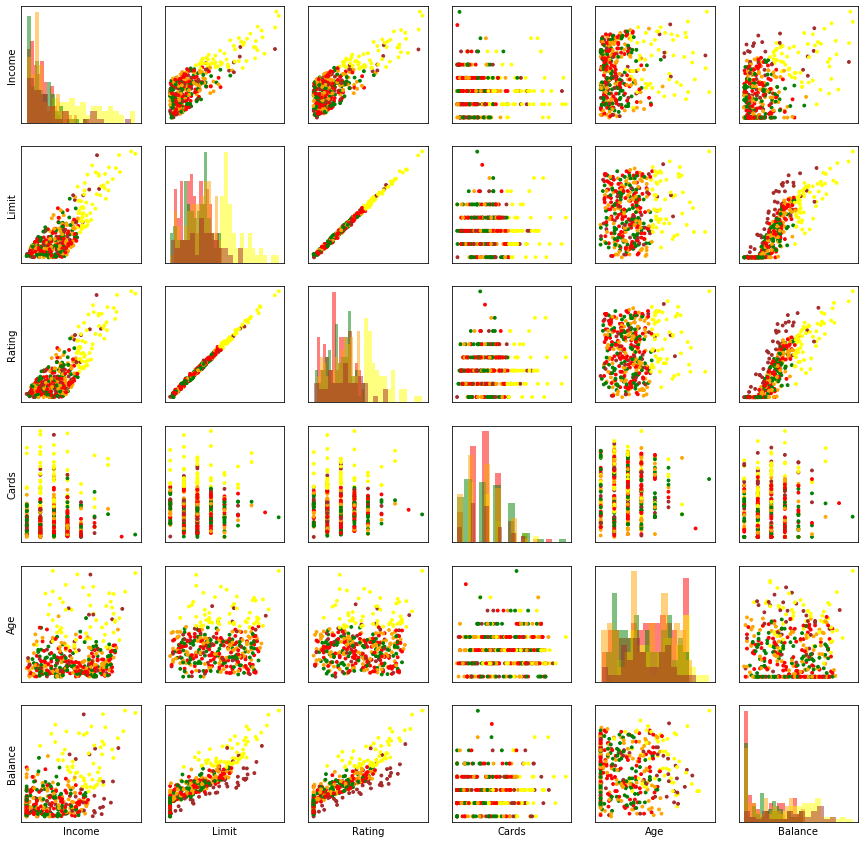

In [48]:
pairplot(credit[num_features], y_pred5, np.array(['red', 'yellow', 'green', 'orange', 'brown']))

In [51]:
value_counts(credit[cat_features], y_pred5)

---- Gender ---
cluster     0     1     2     3     4
Gender                               
Female   59.0  25.0   NaN  99.0  24.0
Male     53.0  31.0  93.0   NaN  16.0
---- Student ---
cluster      0     1     2     3     4
Student                               
No       112.0  56.0  93.0  99.0   NaN
Yes        NaN   NaN   NaN   NaN  40.0
---- Married ---
cluster      0     1     2     3     4
Married                               
No       112.0  23.0   NaN   NaN  20.0
Yes        NaN  33.0  93.0  99.0  20.0
---- Ethnicity ---
cluster            0   1   2   3   4
Ethnicity                           
African American  34  16  22  17  10
Asian             21  14  24  30  13
Caucasian         57  26  47  52  17


# Hierarchical (agglomerative) clustering

In sklearn, hierarchical clustering is represented only by agglomerative clustering. You can choose one of the three criteria for combining two clusters into a larger cluster:
1. 'ward' - minimization of dispersion within the united clusters
2. 'average' - minimization of the average distance between a pair of observations in a cluster
3. 'complete' - maximization of the distance between two observations of different clusters

Lets apply all three criteria in turns.

As you know, to apply hierarchical clustering, a matrix of pairwise distances is needed. If the data is structured, for example, graphs, then you can pass the connectivity matrix as an argument. If we do not use restrictions on the coherence of observations, then it suffices to choose an appropriate affinity measure and pairwise distances will be calculated by the method automatically. In the examples below, we use the Euclidean distance.

As with the K-Means algorithm, you must select the number of clusters.

### Ward

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

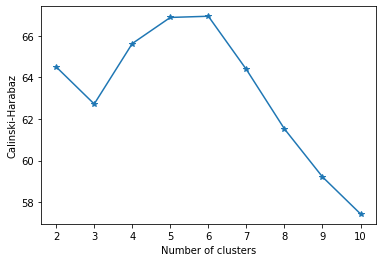

In [52]:
from sklearn.cluster import AgglomerativeClustering

J = []
params = np.arange(2, 11)
for k in params:
    ward_arc = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean') 
    # Further we will omit affinity='euclidean', as it is the default value
    ward_arc.fit(X)
    J.append(calinski_harabaz_score(X, ward_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

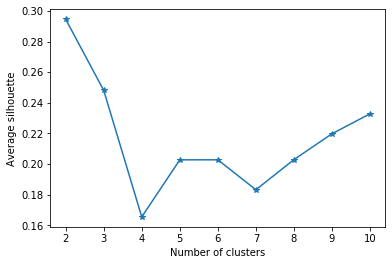

In [36]:
J = []
params = np.arange(2, 11)
for k in params:
    ward_arc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    ward_arc.fit(X)
    J.append(silhouette_score(X, ward_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Both measures have high values for dividing in 2 clusters. Let's see what happens in this case.

Algorithm: Ward, 2 clusters
Calinski-Harabaz: 64.5112
Average silhouette: 0.2946


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


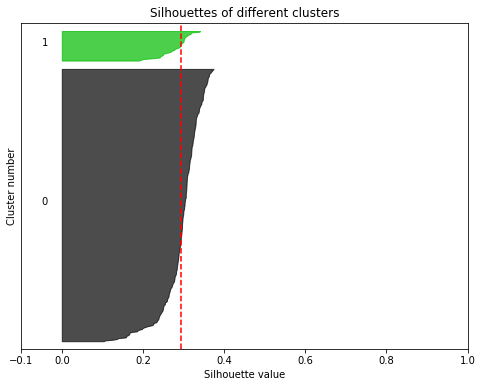

In [53]:
ward_agc = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_ward2 = ward_agc.fit_predict(X)
estimate_cluster(X, y_ward2, 'Ward, 2 clusters')

In comparison with to K-Means, we improved the results for the average silhouette, but worsened for another measure.

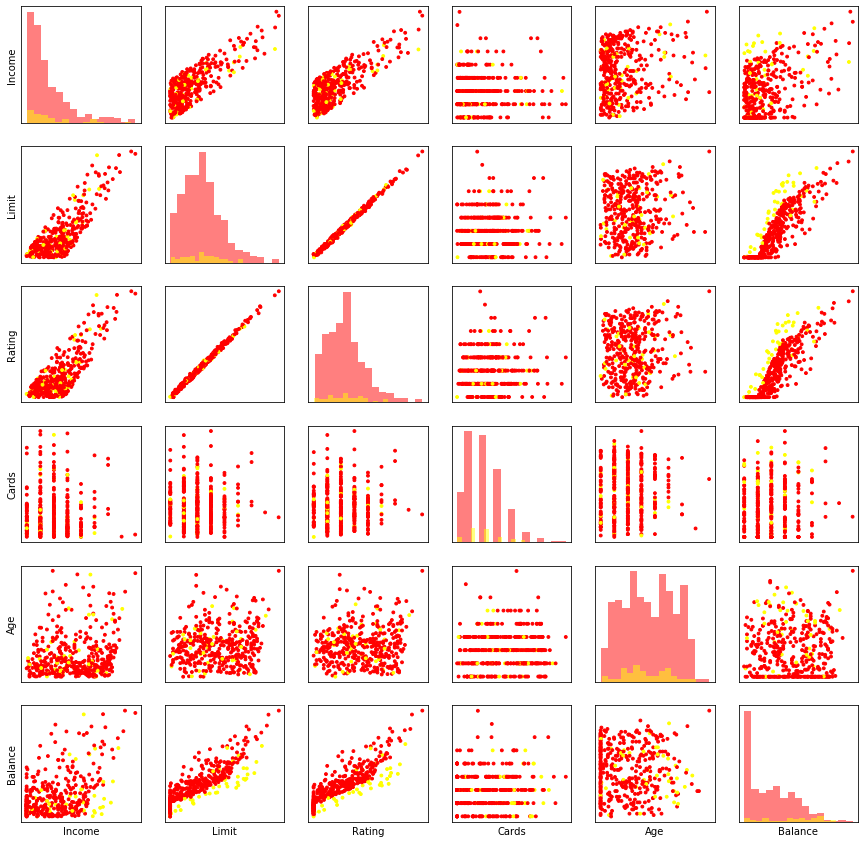

In [54]:
pairplot(credit[num_features], y_ward2, np.array(['red', 'yellow']))

In [39]:
value_counts(credit[cat_features], y_ward2)

---- Gender ---
cluster    0   1
Gender          
Female   183  24
Male     177  16
---- Student ---
cluster      0     1
Student             
No       360.0   NaN
Yes        NaN  40.0
---- Married ---
cluster    0   1
Married         
No       135  20
Yes      225  20
---- Ethnicity ---
cluster             0   1
Ethnicity                
African American   89  10
Asian              89  13
Caucasian         182  17


We will do the same for the other criteria of agglomerative clustering.

### Average

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

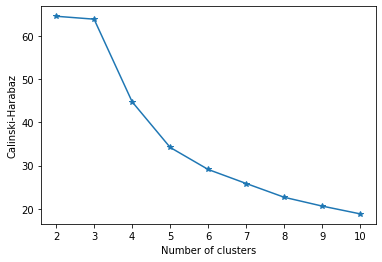

In [40]:
J = []
params = np.arange(2, 11)
for k in params:
    average_arc = AgglomerativeClustering(n_clusters=k, linkage='average')
    average_arc.fit(X)
    J.append(calinski_harabaz_score(X, average_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

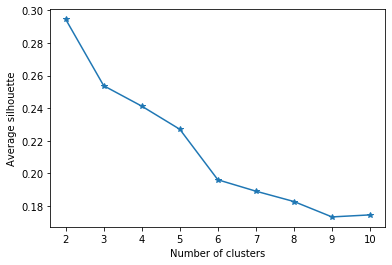

In [41]:
J = []
params = np.arange(2, 11)
for k in params:
    average_arc = AgglomerativeClustering(n_clusters=k, linkage='average')
    average_arc.fit(X)
    J.append(silhouette_score(X, average_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Both measures decrease with an increase in the number of clusters. Starting at 3, Calinski-Harabaz measure begins to decrease sharply, let's try to break the data into 3 clusters.

Algorithm: Average, 3 clusters
Calinski-Harabaz: 63.8346
Average silhouette: 0.2538


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


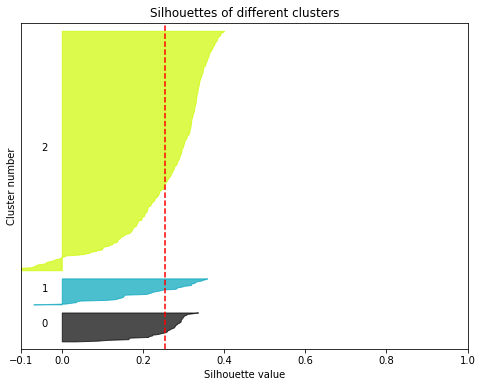

In [55]:
average_agc = AgglomerativeClustering(n_clusters=3, linkage='average', compute_full_tree=True)
y_average3 = average_agc.fit_predict(X)
estimate_cluster(X, y_average3, 'Average, 3 clusters')

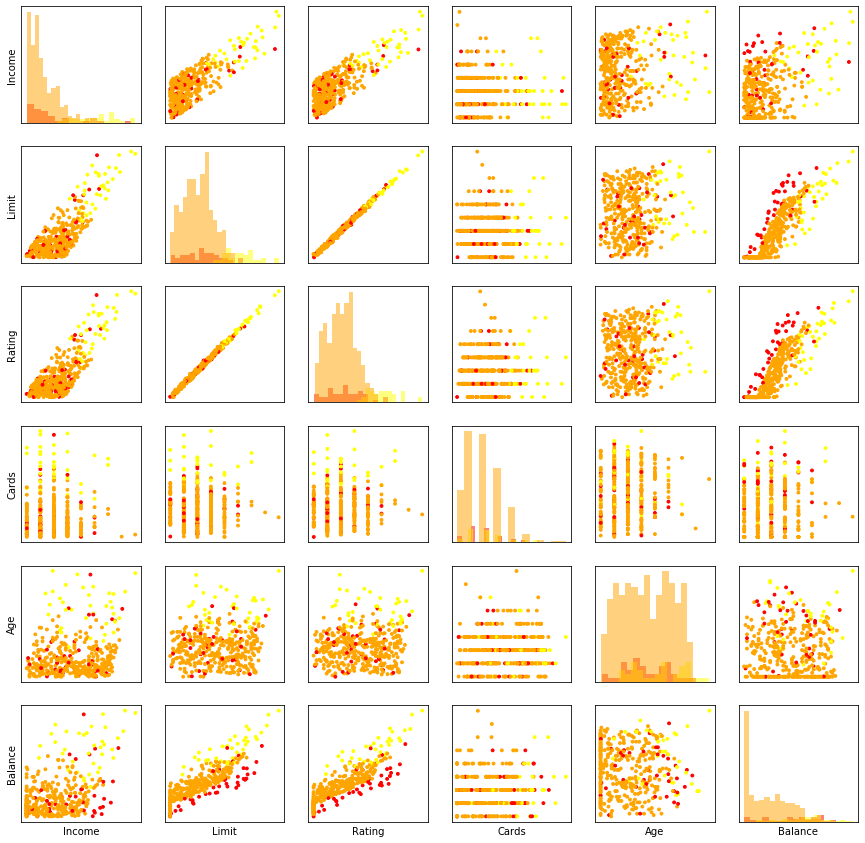

In [44]:
pairplot(credit[num_features], y_average3, np.array(['red', 'yellow', 'orange']))

In [56]:
y_average3

array([2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

In [45]:
value_counts(credit[cat_features], y_average3)

---- Gender ---
cluster   0   1    2
Gender              
Female   24  16  167
Male     16  20  157
---- Student ---
cluster     0     1      2
Student                   
No        NaN  36.0  324.0
Yes      40.0   NaN    NaN
---- Married ---
cluster   0   1    2
Married             
No       20  15  120
Yes      20  21  204
---- Ethnicity ---
cluster            0   1    2
Ethnicity                    
African American  10  13   76
Asian             13   7   82
Caucasian         17  16  166


### Complete

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

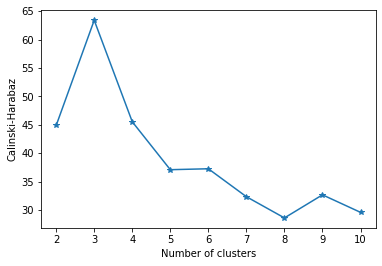

In [57]:
J = []
params = np.arange(2, 11)
for k in params:
    complete_arc = AgglomerativeClustering(n_clusters=k, linkage='complete')
    complete_arc.fit(X)
    J.append(calinski_harabaz_score(X, complete_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

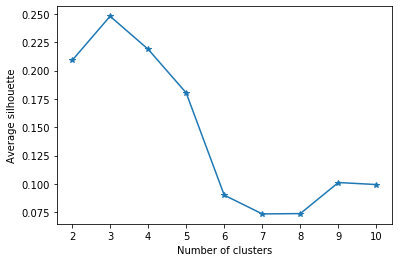

In [58]:
J = []
params = np.arange(2, 11)
for k in params:
    complete_arc = AgglomerativeClustering(n_clusters=k, linkage='complete')
    complete_arc.fit(X)
    J.append(silhouette_score(X, complete_arc.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Starting at 3 clusters, both measures are rapidly decreasing.

Algorithm: Complete, 3 clusters
Calinski-Harabaz: 63.3899
Average silhouette: 0.2479


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


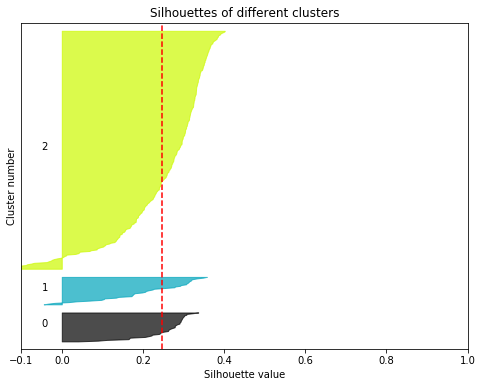

In [59]:
complete_agc = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_full_tree=True)
y_complete3 = complete_agc.fit_predict(X)
estimate_cluster(X, y_complete3, 'Complete, 3 clusters')

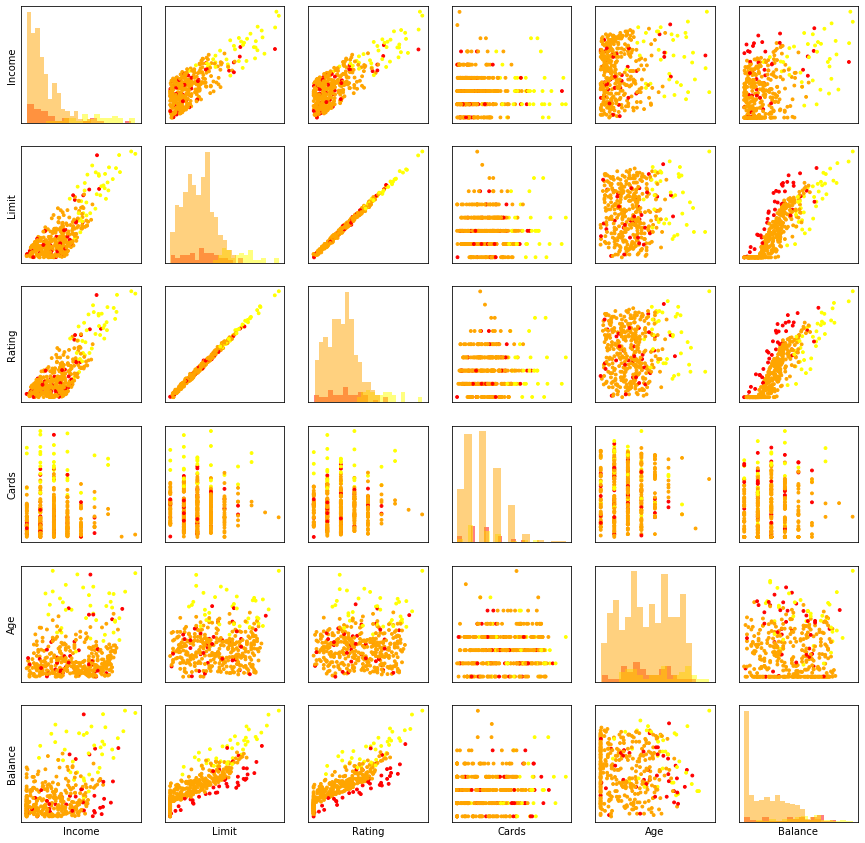

In [49]:
pairplot(credit[num_features], y_complete3, np.array(['red', 'yellow', 'orange']))

In [50]:
value_counts(credit[cat_features], y_complete3)

---- Gender ---
cluster   0   1    2
Gender              
Female   24  12  171
Male     16  26  151
---- Student ---
cluster     0     1      2
Student                   
No        NaN  38.0  322.0
Yes      40.0   NaN    NaN
---- Married ---
cluster   0   1    2
Married             
No       20  17  118
Yes      20  21  204
---- Ethnicity ---
cluster            0   1    2
Ethnicity                    
African American  10   9   80
Asian             13  12   77
Caucasian         17  17  165


### Hierarchical clustering in SciPy

Unfortunately, sklearn has the opportunity to look at the procedure for combining smaller clusters into larger ones, but without taking into account the distance between them. But this feature is presented in the SciPy package. Sklearn also lacks the ability to evaluate cofenetic corelation. Below is an example of how to do this for the 'ward' criterion and Euclidean distance in SciPy.

Documentation: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

Tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

Z = linkage(X, method='ward', metric='euclidean')

c, coph_dists = cophenet(Z, pdist(X))
c

0.6752435350970234

Every row of Z is formatted as [idx1, idx2, dist, sample_count].

In [62]:
Z[0]

array([125.        , 167.        ,   0.23009411,   2.        ])

At the first step, the algorithm decided to combine the clusters with numbers 125 and 167 (objects).The distance between them is 0.23. As a result we got a cluster containing 2 objects with the number X.shape[0], since the numbers from 0 to X.shape[0]-1 correspond to objects. In our case, this cluster received an index of 400.

In [63]:
np.set_printoptions(precision=5, suppress=True)
Z[:20]

array([[125.     , 167.     ,   0.23009,   2.     ],
       [143.     , 362.     ,   0.23833,   2.     ],
       [175.     , 247.     ,   0.24269,   2.     ],
       [ 30.     , 269.     ,   0.25381,   2.     ],
       [296.     , 302.     ,   0.2582 ,   2.     ],
       [146.     , 311.     ,   0.31344,   2.     ],
       [147.     , 377.     ,   0.32025,   2.     ],
       [124.     , 400.     ,   0.37593,   3.     ],
       [ 54.     , 285.     ,   0.38542,   2.     ],
       [138.     , 148.     ,   0.38718,   2.     ],
       [208.     , 255.     ,   0.40331,   2.     ],
       [366.     , 369.     ,   0.40631,   2.     ],
       [ 20.     , 246.     ,   0.41838,   2.     ],
       [131.     , 149.     ,   0.42113,   2.     ],
       [321.     , 335.     ,   0.42636,   2.     ],
       [264.     , 300.     ,   0.45598,   2.     ],
       [ 18.     ,  43.     ,   0.46963,   2.     ],
       [ 55.     , 120.     ,   0.49713,   2.     ],
       [105.     , 210.     ,   0.50379,   2. 

At the eighth step, a cluster is first created from a cluster and an object. The cluster with index 400 and object 124 are combined. Let's look at the values of the attributes that have fallen into the cluster.

In [64]:
credit.iloc[[125, 167, 124], :]

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance
126,27.578,2531,195,1,34,Female,No,Yes,Caucasian,0
168,29.403,2327,178,1,37,Female,No,Yes,Caucasian,0
125,29.564,2529,192,1,30,Female,No,Yes,Caucasian,0


Draw a dendrogram.

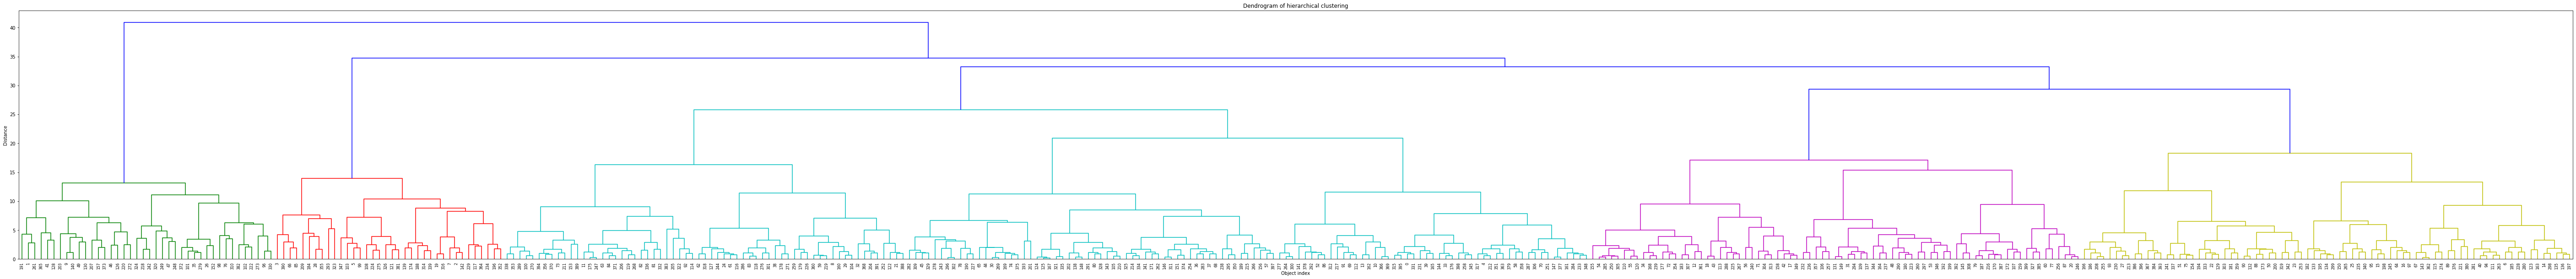

In [65]:
plt.figure(figsize=(100, 10))
plt.title('Dendrogram of hierarchical clustering')
plt.xlabel('Object index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotate labels 90 degrees
    leaf_font_size=8.,  # leaf label font size
)
plt.show()

It turned out to be bulky, but can be reduced by eliminating small clusters.

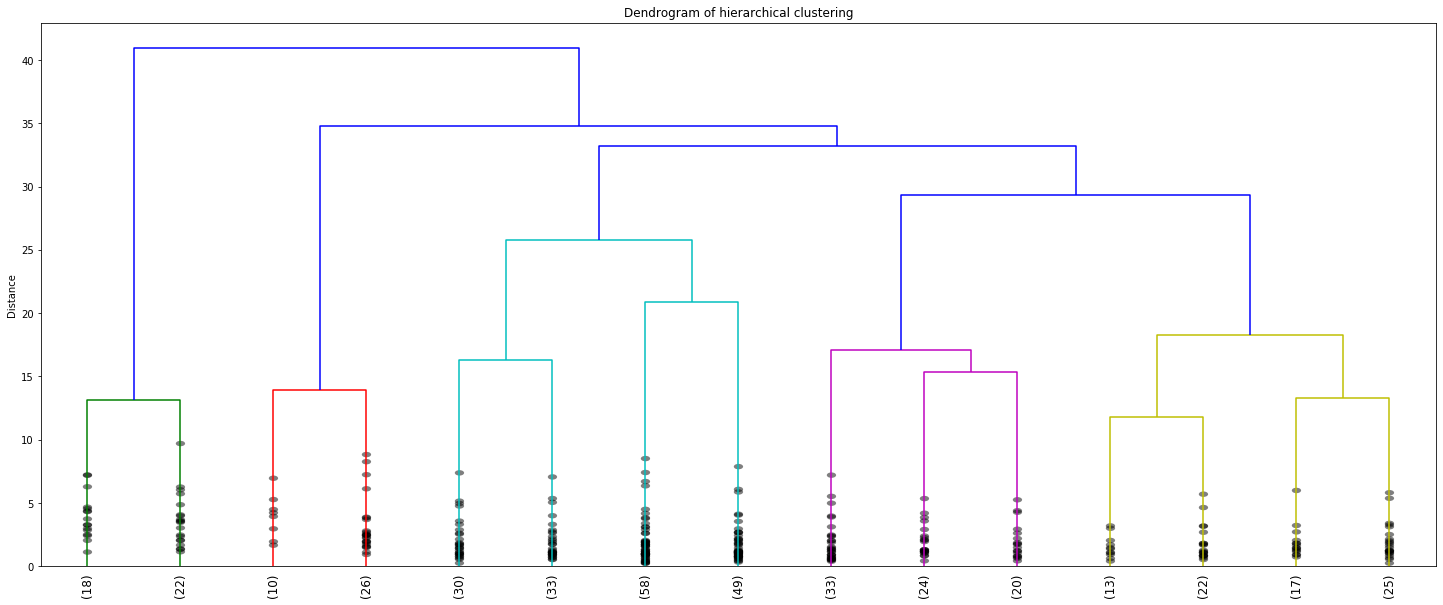

In [56]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram of hierarchical clustering')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only latest p clusters
    p=15,  # number of clusters to show
    show_leaf_counts=True,  # show number of objects in leaf nodes
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # show contracted branches
)
plt.show()

If you need to see the values of the target indicator in clusters and choose a threshold value to determine the number of clusters, you can use the function below (original: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/).

In [57]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

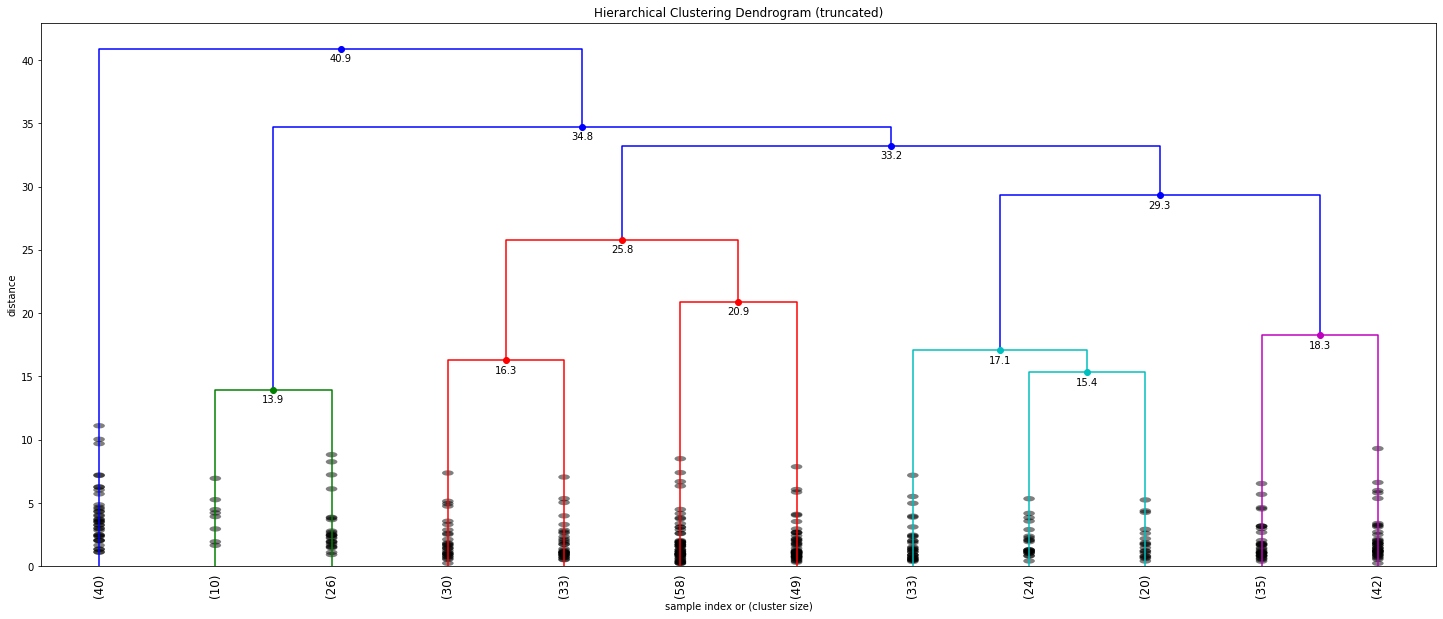

In [58]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  # lower threshold for the value of an annotated node
)
plt.show()

Now the algorithm proposes to select 5 clusters (highlighted in colors). You can change them by setting a treshold distance.

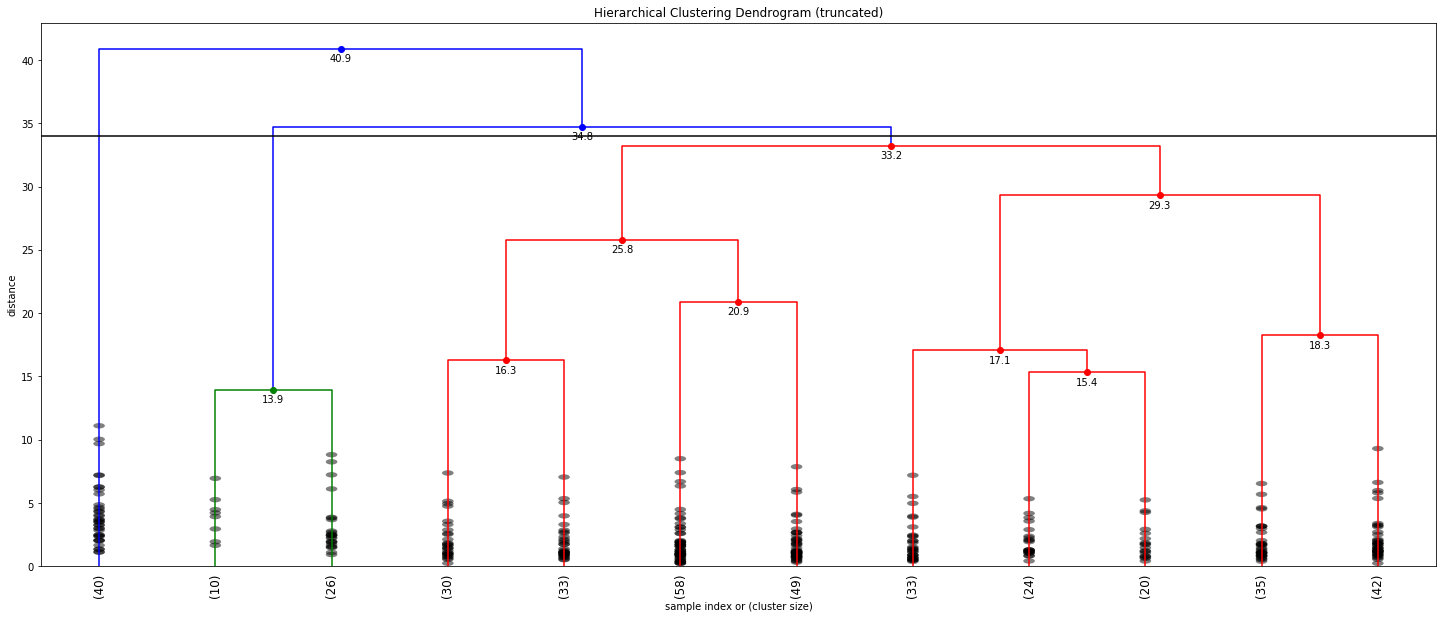

In [59]:
max_d = 34
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,
)
plt.show()

### DBSCAN

Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

The visualization code is a modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

Estimate number of clusters: 21


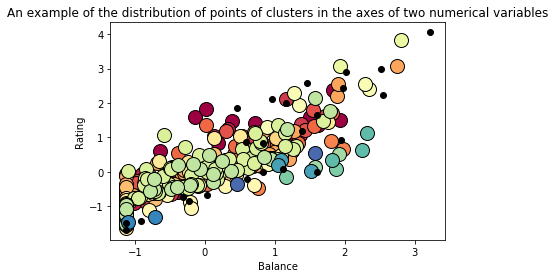

In [67]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.8, min_samples=2, metric='euclidean').fit(X)
                                                                
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create an empty array with the same size as cluster label array
core_samples_mask[db.core_sample_indices_] = True # array of indicators of clusters' "inner points"
labels = db.labels_

# Counting the number of clusters excluding noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimate number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] # Exclude black from the color scheme.


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Use black for outliers
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy_core = X[class_member_mask & core_samples_mask]
    xy_not_core = X[class_member_mask & ~core_samples_mask]

    plt.plot(xy_core[:, 5], xy_core[:, 2], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=14)
    plt.plot(xy_not_core[:, 5], xy_not_core[:, 2], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6)
plt.xlabel(num_features[5])
plt.ylabel(num_features[2])
plt.title('An example of the distribution of points of clusters in the axes of two numerical variables')
plt.show()

Algorithm: DBSCAN, eps=2.8, min_samples=2
Calinski-Harabaz: 28.2423
Average silhouette: 0.2506


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


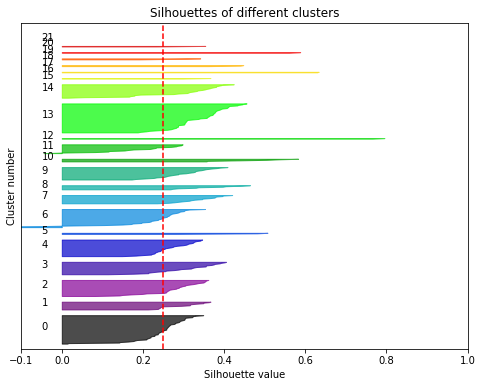

In [68]:
estimate_cluster(X, labels, 'DBSCAN, eps=2.8, min_samples=2')

To understand how the number of allocated clusters changes depending on the eps and min_samples parameters, we can estimate the number of clusters on the value grid, as well as the average silhouette and Calinski-Harabaz measure.

In [69]:
eps_values = np.arange(0.1, 3, 0.1)
min_sample_values = np.arange(2, 30)
n_cluster_estimates = np.zeros((len(eps_values), len(min_sample_values)))
silhouette = np.zeros(((len(eps_values)), len(min_sample_values)))
calinski = np.zeros(((len(eps_values)), len(min_sample_values)))

for i, eps in enumerate(eps_values):
    for j, min_sample in enumerate(min_sample_values):
        db = DBSCAN(eps=eps, min_samples=min_sample, metric='euclidean').fit(X)
        n_cluster_estimates[i, j]  = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        if n_cluster_estimates[i, j] > 1:
            silhouette[i, j] = silhouette_score(X, db.labels_)
            calinski[i, j] = calinski_harabaz_score(X, db.labels_)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

In [70]:
eps_values = np.arange(0.1, 3, 0.1)
min_sample_values = np.arange(2, 30)
n_cluster_estimates = np.zeros((len(eps_values), len(min_sample_values)))

for i, eps in enumerate(eps_values):
    for j, min_sample in enumerate(min_sample_values):
        db = DBSCAN(eps=eps, min_samples=min_sample, metric='euclidean').fit(X)
        n_cluster_estimates[i, j]  = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

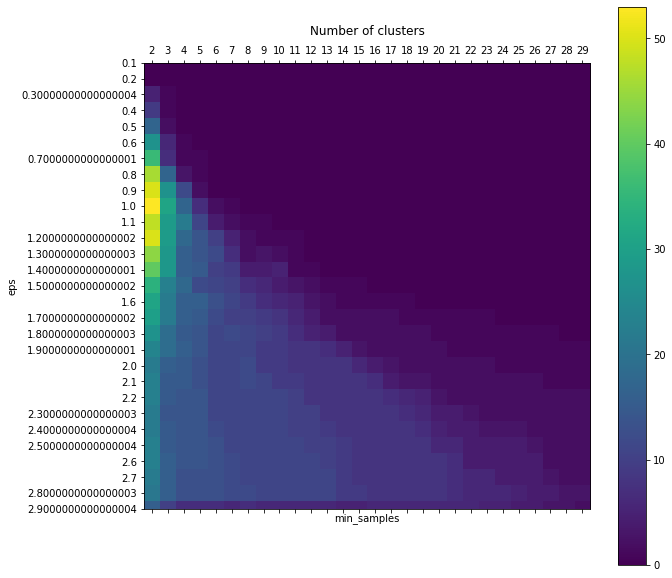

In [65]:
plt.figure(figsize=(10,10))        
plt.matshow(n_cluster_estimates, fignum=1)
plt.colorbar()
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Number of clusters')
plt.xticks(np.arange(len(min_sample_values)), min_sample_values)
plt.yticks(np.arange(len(eps_values)), eps_values)
plt.show()

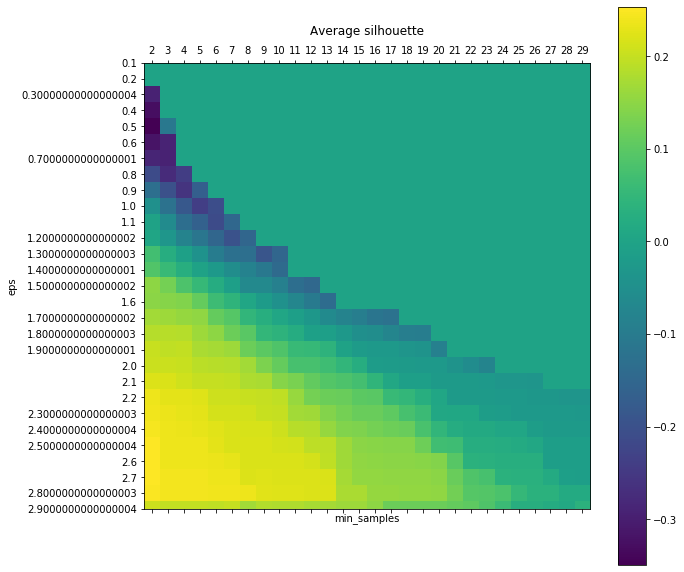

In [71]:
plt.figure(figsize=(10,10))        
plt.matshow(silhouette, fignum=1)
plt.colorbar()
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Average silhouette')
plt.xticks(np.arange(len(min_sample_values)), min_sample_values)
plt.yticks(np.arange(len(eps_values)), eps_values)
plt.show()

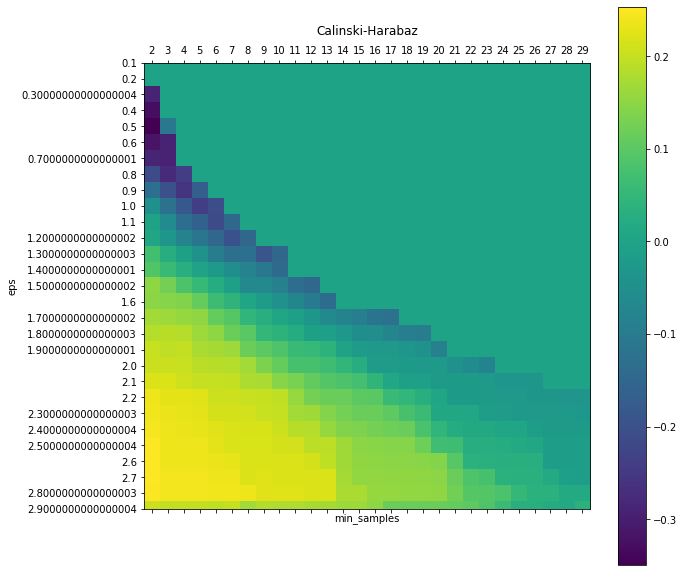

In [67]:
plt.figure(figsize=(10,10))        
plt.matshow(silhouette, fignum=1)
plt.colorbar()
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Calinski-Harabaz')
plt.xticks(np.arange(len(min_sample_values)), min_sample_values)
plt.yticks(np.arange(len(eps_values)), eps_values)
plt.show()

### Spectral clustering

Since spectral clustering is clustering on graphs, it is necessary to construct a similarity graph for existing objects. In sklearn, you don’t have to do this yourself, but just choose a way to define it (affinity). The easiest way is to connect only the objects closest in Euclidean measure.

In [72]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4).fit(X)
y_spectral_nn3 = spectral.labels_

In [73]:
spectral

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=3, n_init=10,
                   n_jobs=4, n_neighbors=10, random_state=None)

Algorithm: Spectral clustering (nn), 3 clusters
Calinski-Harabaz: 38.6202
Average silhouette: 0.0534


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


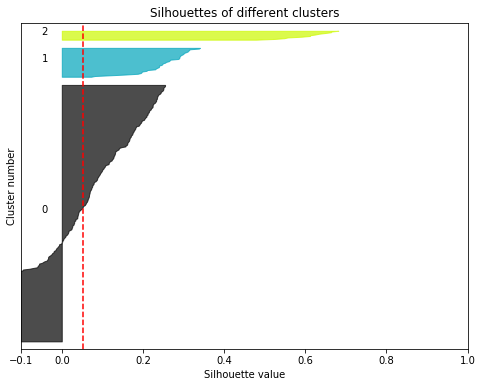

In [74]:
estimate_cluster(X, y_spectral_nn3, 'Spectral clustering (nn), 3 clusters')

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

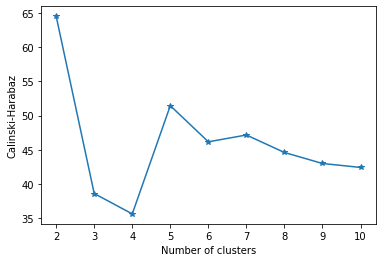

In [75]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4)
    spectral.fit(X)
    J.append(calinski_harabaz_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

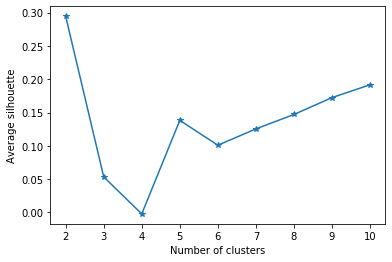

In [76]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors=10, n_jobs=4)
    spectral.fit(X)
    J.append(silhouette_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Algorithm: Spectral clustering (nn), 5 clusters
Calinski-Harabaz: 51.4514
Average silhouette: 0.1363


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


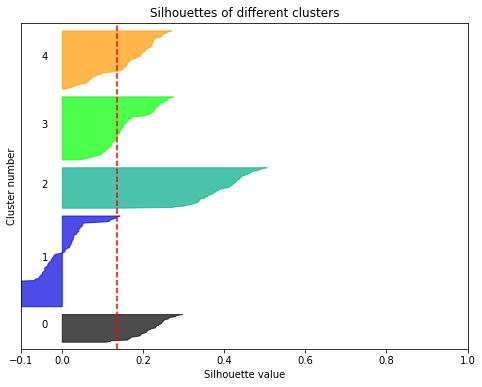

In [77]:
spectral = SpectralClustering(n_clusters=5
                              , affinity='nearest_neighbors', n_neighbors=10, n_jobs=4).fit(X)
y_spectral_nn5 = spectral.labels_
estimate_cluster(X, y_spectral_nn5, 'Spectral clustering (nn), 5 clusters')

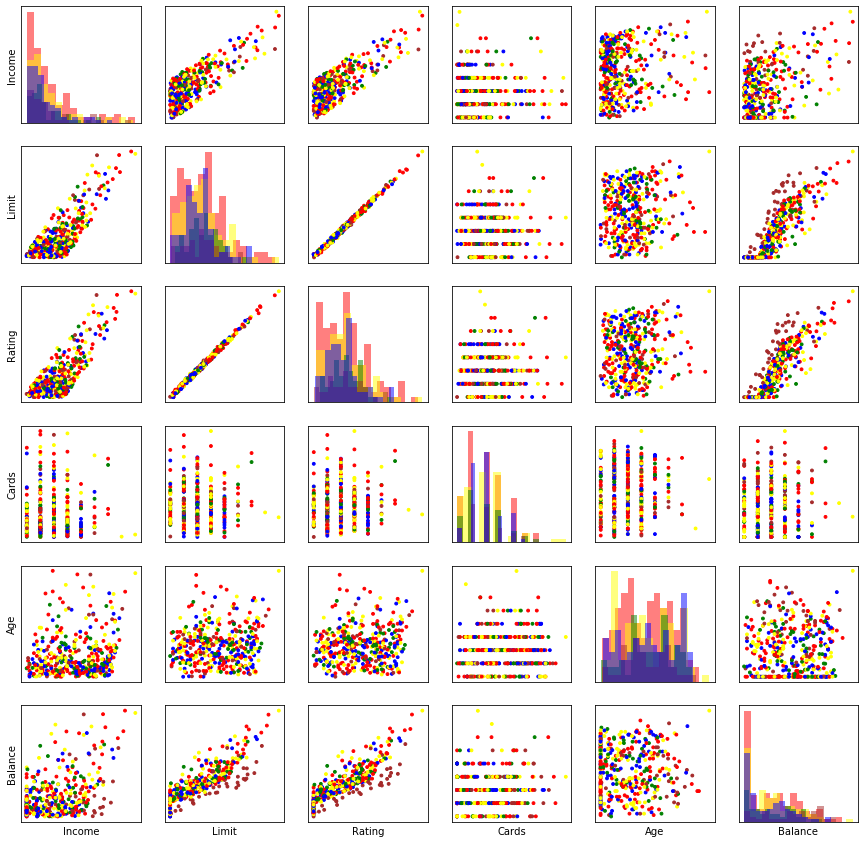

In [76]:
pairplot(credit[num_features], y_spectral_nn5, np.array(['red', 'yellow', 'green', 'brown', 'blue']))

In [77]:
value_counts(credit[cat_features], y_spectral_nn5)

---- Gender ---
cluster     0     1     2     3     4
Gender                               
Female   85.0   NaN  58.0  24.0  40.0
Male     44.0  90.0   NaN  16.0  43.0
---- Student ---
cluster      0     1     2     3     4
Student                               
No       129.0  90.0  58.0   NaN  83.0
Yes        NaN   NaN   NaN  40.0   NaN
---- Married ---
cluster     0     1     2     3     4
Married                              
No       61.0  33.0   NaN  20.0  41.0
Yes      68.0  57.0  58.0  20.0  42.0
---- Ethnicity ---
cluster              0     1     2     3     4
Ethnicity                                     
African American   6.0   NaN   NaN  10.0  83.0
Asian             89.0   NaN   NaN  13.0   NaN
Caucasian         34.0  90.0  58.0  17.0   NaN


Another example: use the Gaussian core to determine the similarity.

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/An

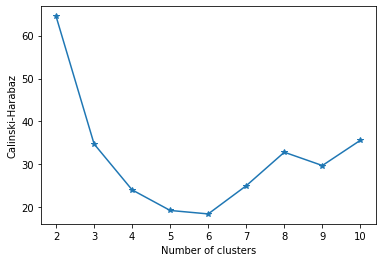

In [79]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', n_jobs=4)
    spectral.fit(X)
    J.append(calinski_harabaz_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

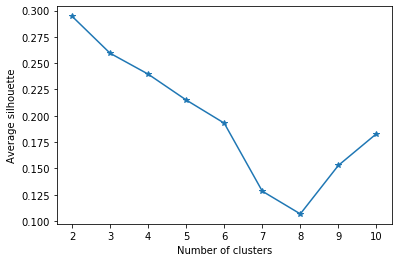

In [79]:
J = []
params = np.arange(2, 11)
for k in params:
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', n_jobs=4)
    spectral.fit(X)
    J.append(silhouette_score(X, spectral.labels_))
J = np.array(J)
plt.plot(params, J, '-*')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

We got very bad values of the average silhouette, i.e. in this case, the Gaussian core is not suitable for describing the data structure.